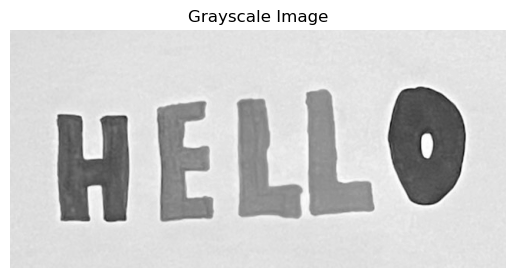

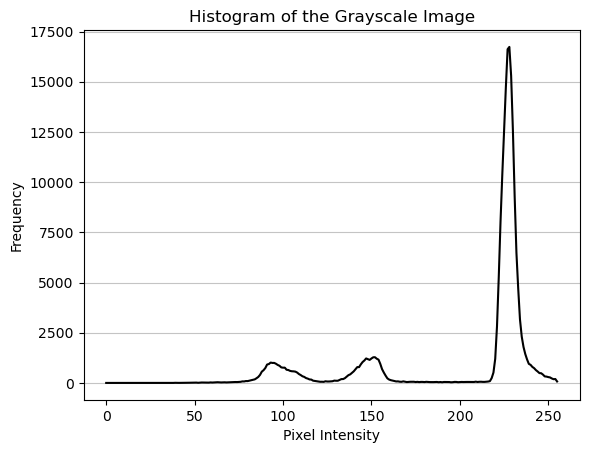

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2



image_path = 'hello.jpg'  
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  
plt.title('Grayscale Image')
plt.show()

# Calculate the histogram
histogram = np.histogram(gray_image, bins=256, range=(0, 255))[0]

# Plot the histogram
plt.plot(histogram, color='black')
plt.title('Histogram of the Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


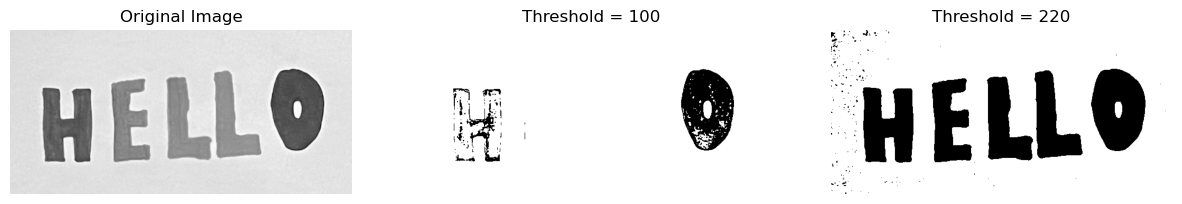

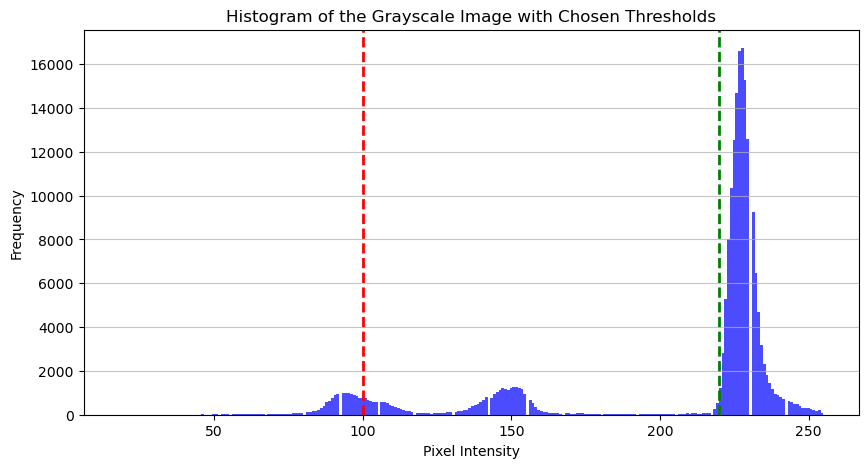

In [4]:


# Convert the grayscale image to a numpy array for processing
gray_array = np.array(gray_image)

# Apply the first threshold
threshold1 = 100
binary_image1 = (gray_array >= threshold1).astype(int)

# Apply the second threshold
threshold2 = 220
binary_image2 = (gray_array >= threshold2).astype(int)

# Display 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_image1, cmap='gray')
ax[1].set_title(f'Threshold = {threshold1}')
ax[1].axis('off')

ax[2].imshow(binary_image2, cmap='gray')
ax[2].set_title(f'Threshold = {threshold2}')
ax[2].axis('off')

plt.show()


plt.figure(figsize=(10, 5))
plt.hist(gray_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.axvline(threshold1, color='red', linestyle='dashed', linewidth=2)
plt.axvline(threshold2, color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of the Grayscale Image with Chosen Thresholds')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


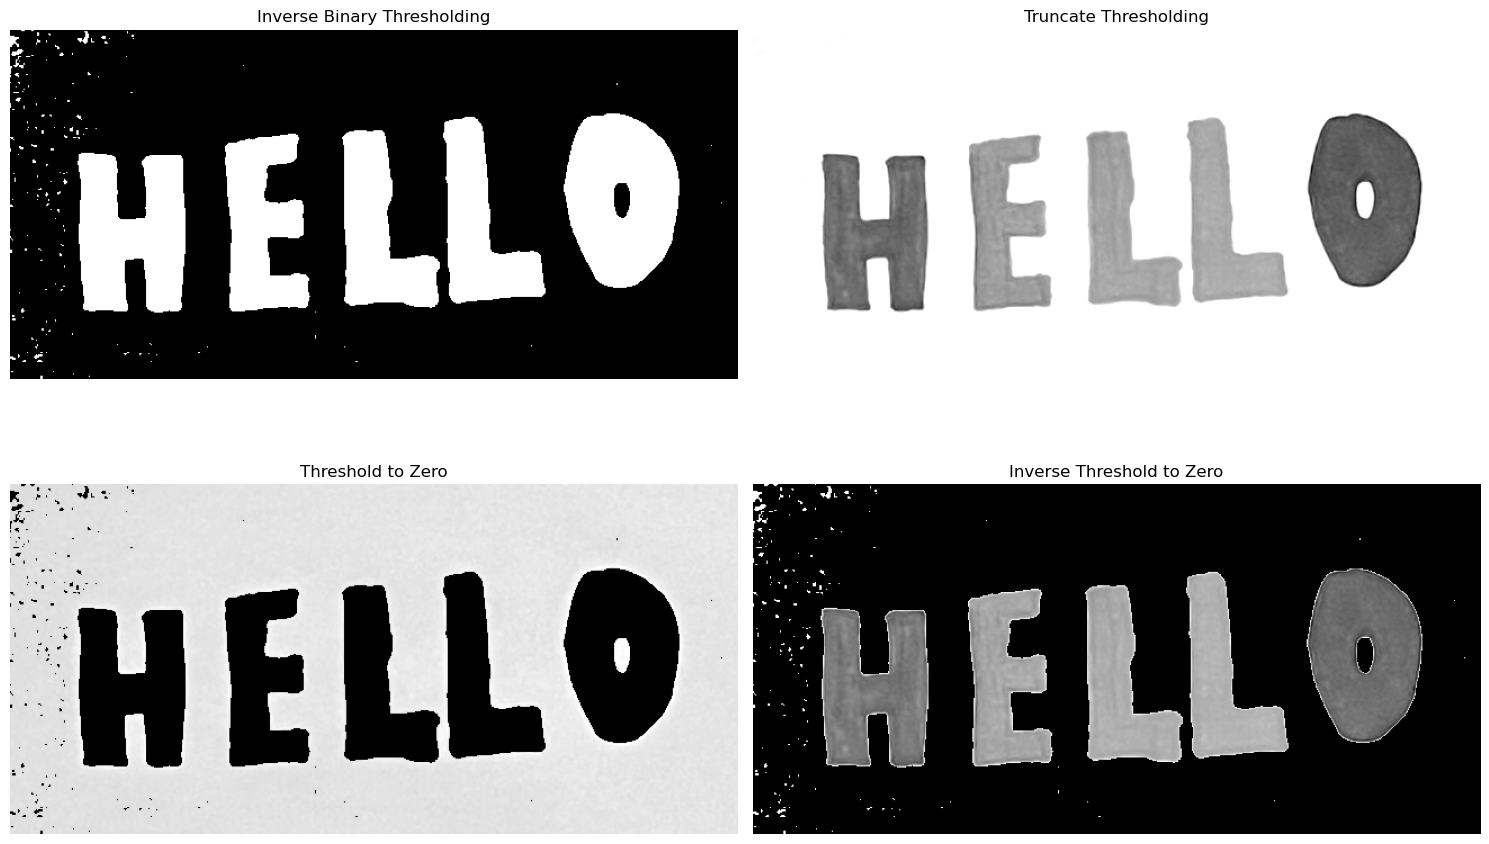

In [8]:

# Inverse binary thresholding
inv_binary_threshold = 220
inv_binary_image = (gray_array < inv_binary_threshold).astype(int)

# Truncate thresholding
trunc_threshold = 220
trunc_image = np.minimum(gray_array, trunc_threshold)

# Threshold to zero
to_zero_threshold = 220
to_zero_image = np.where(gray_array >= to_zero_threshold, gray_array, 0)

# Inverse threshold to zero
inv_to_zero_threshold = 220
inv_to_zero_image = np.where(gray_array < inv_to_zero_threshold, gray_array, 0)

# Display the results

# Set up the matplotlib figure and axes.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  

# Plot each thresholding method on its respective axes.
axes[0, 0].imshow(inv_binary_image, cmap='gray')
axes[0, 0].set_title('Inverse Binary Thresholding')
axes[0, 0].axis('off')

axes[0, 1].imshow(trunc_image, cmap='gray')
axes[0, 1].set_title('Truncate Thresholding')
axes[0, 1].axis('off')

axes[1, 0].imshow(to_zero_image, cmap='gray')
axes[1, 0].set_title('Threshold to Zero')
axes[1, 0].axis('off')

axes[1, 1].imshow(inv_to_zero_image, cmap='gray')
axes[1, 1].set_title('Inverse Threshold to Zero')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


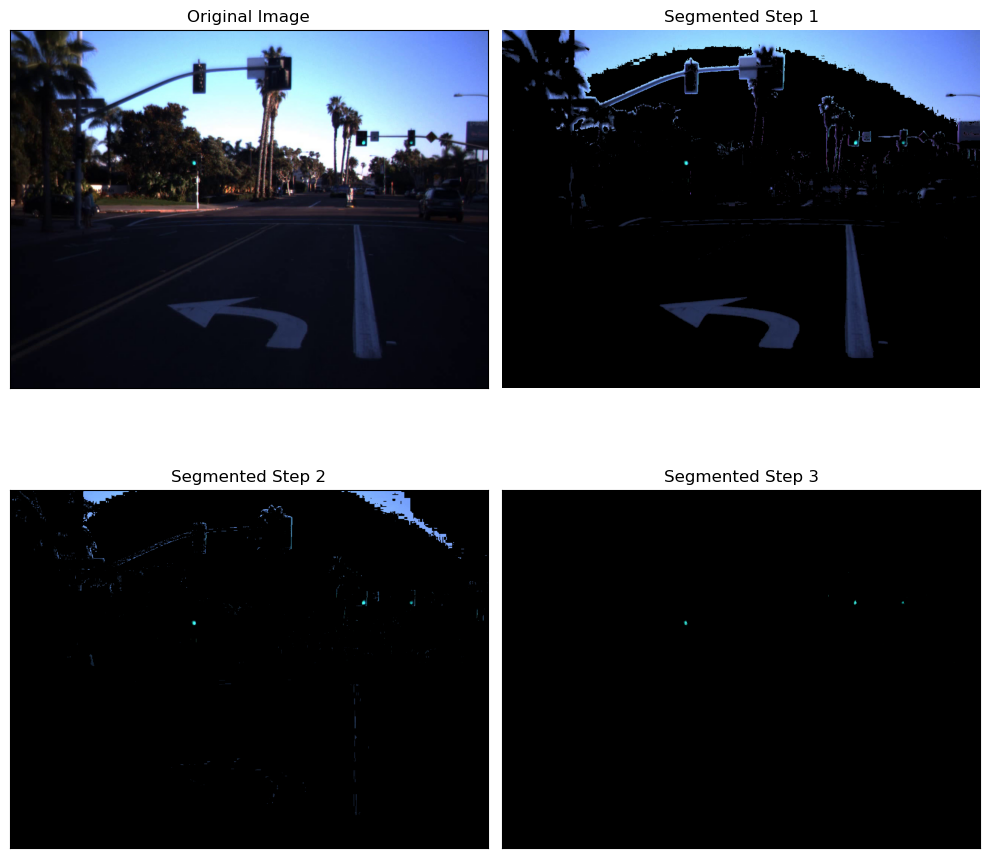

In [4]:
image_path = 'light1.jpg'
original_image = cv2.imread(image_path)

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

# We will create a sequence of images showing the progressive effect of tuning the HSV values

# Define ranges of green color in HSV for three steps leading to the final range
# The final range is known to successfully isolate the green light
ranges = [
    (np.array([60, 100, 40]), np.array([150, 255, 255])),  # Step 1
    (np.array([60, 125, 40]), np.array([110, 255, 255])),  # Step 2
    (np.array([60, 150, 40]), np.array([90, 255, 255]))   # Step 3 (Final)
]

# Initialize list to hold the segmented images
segmented_images = []

# Apply each range of HSV values to segment the image
for lower, upper in ranges:
    mask = cv2.inRange(hsv_image, lower, upper)
    segmented = cv2.bitwise_and(original_image, original_image, mask=mask)
    segmented_images.append(segmented)

# Convert the original and segmented images to RGB for display
original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
segmented_images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in segmented_images]

# Display the original and segmented images in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

# Place the original image in the top left
axes[0, 0].imshow(original_rgb)
axes[0, 0].set_title('Original Image')

# Remove the plot from the top right
axes[0, 1].axis('off')

# Place each segmented image in the remaining three plots
for i, img_rgb in enumerate(segmented_images_rgb):
    ax = axes.flatten()[i+1]  # Get the next axis for the segmented image
    ax.imshow(img_rgb)
    ax.set_title(f'Segmented Step {i+1}')

plt.tight_layout()
plt.show()

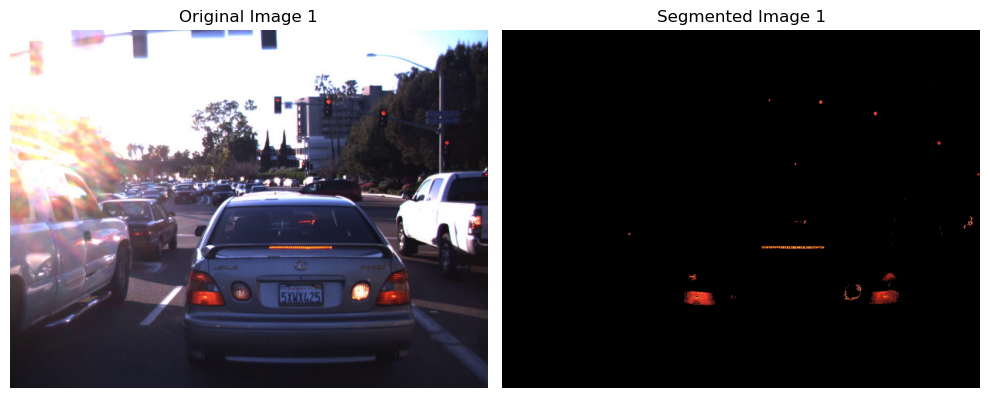

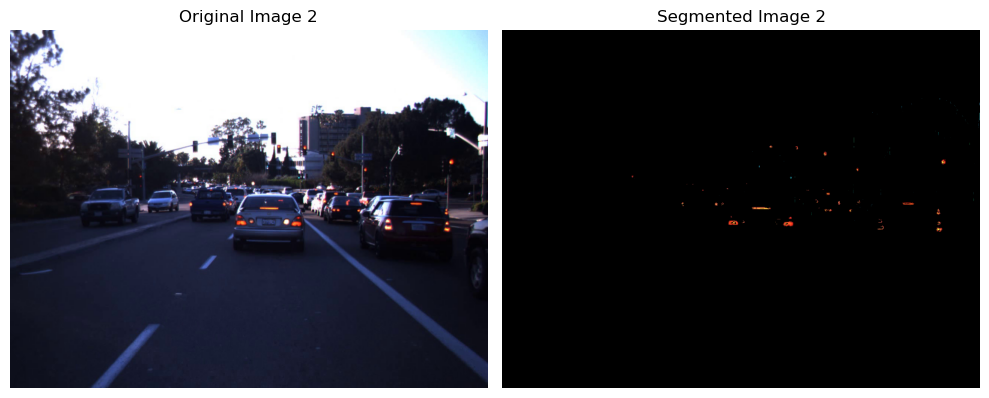

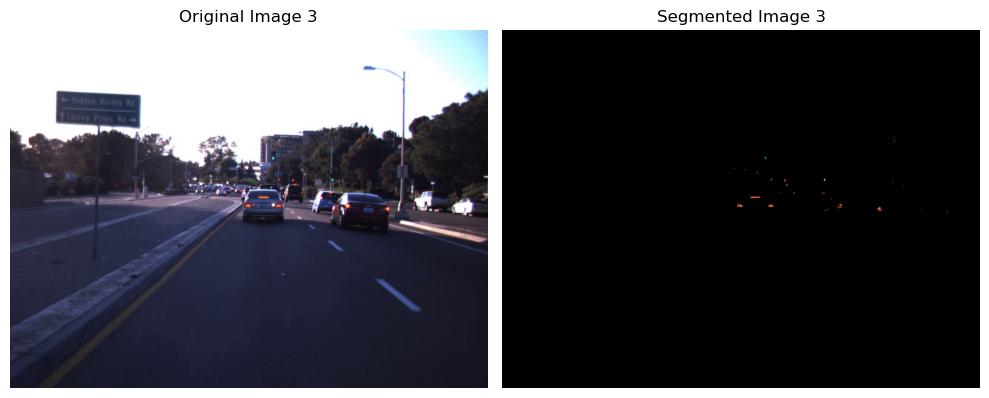

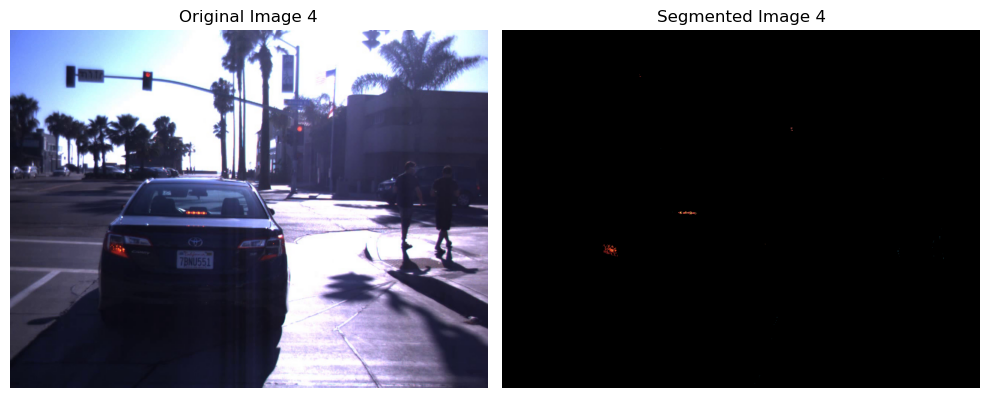

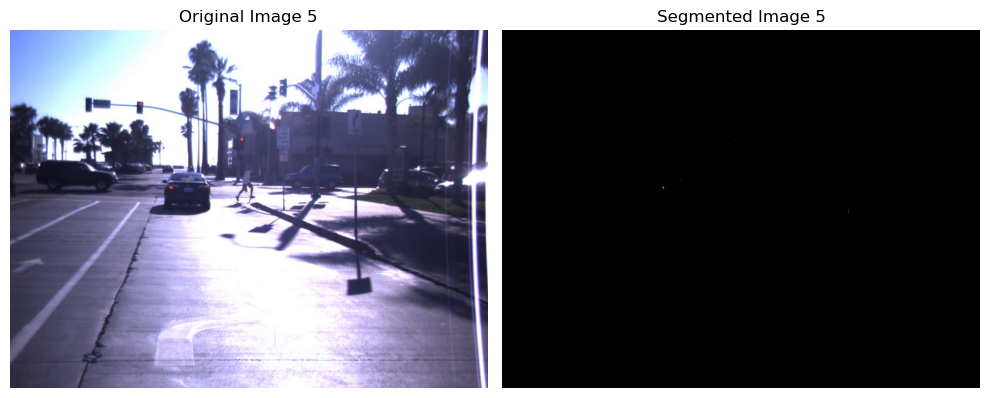

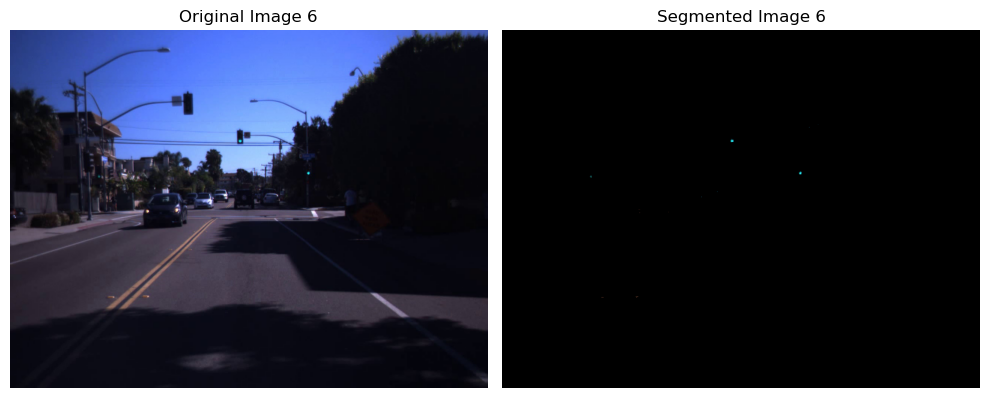

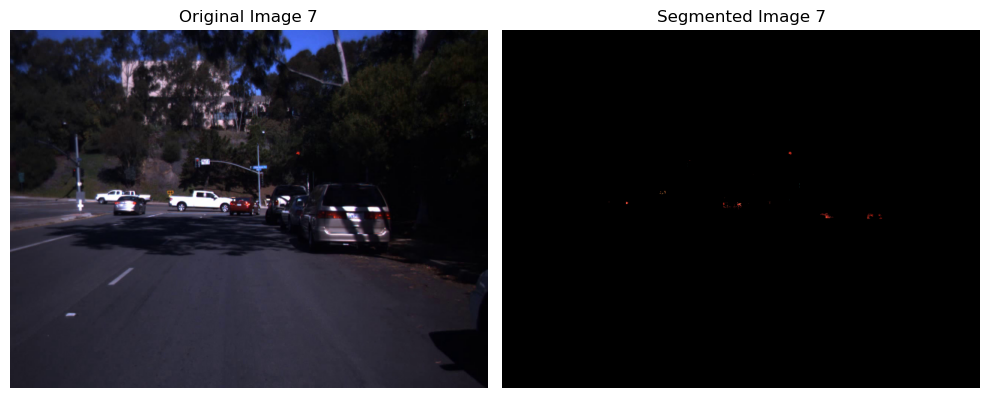

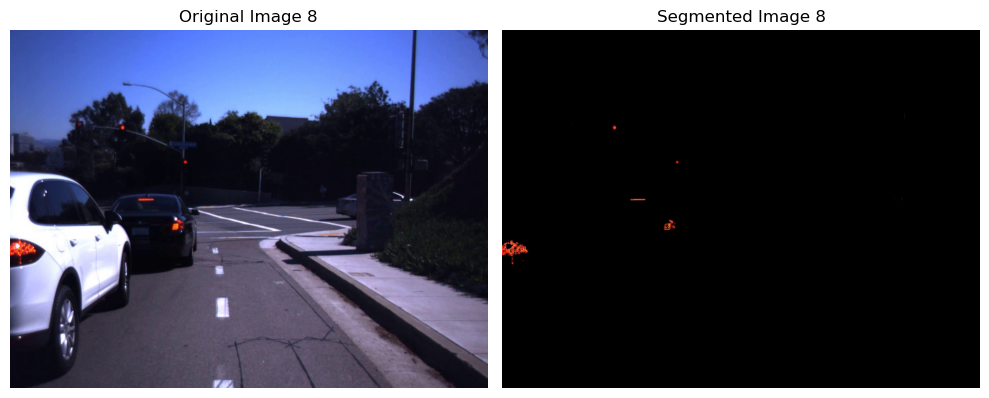

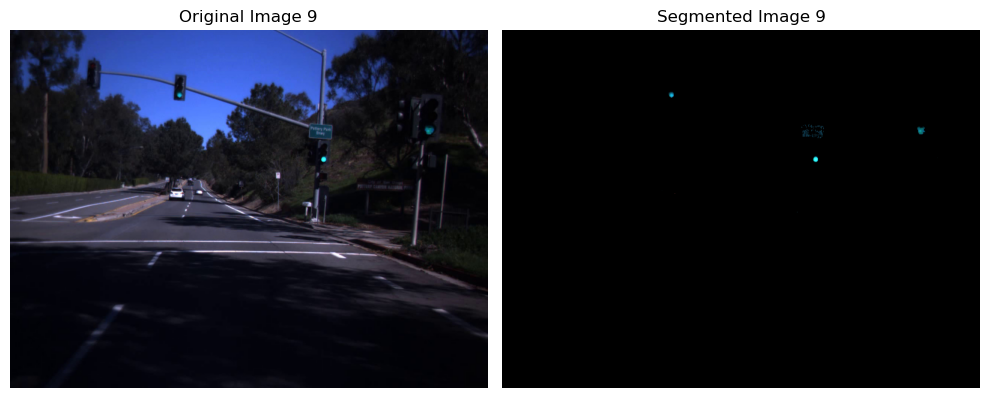

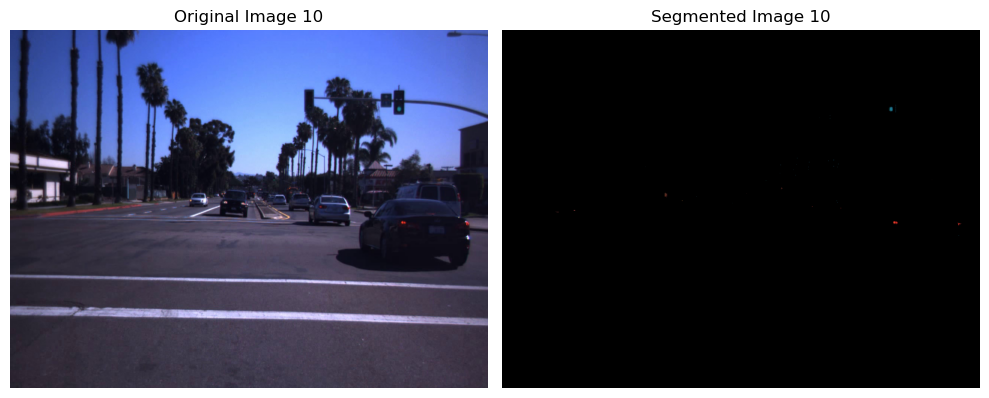

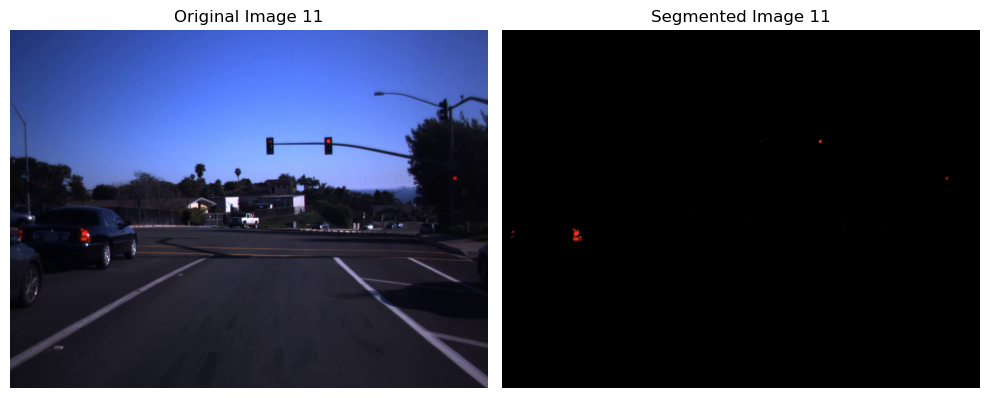

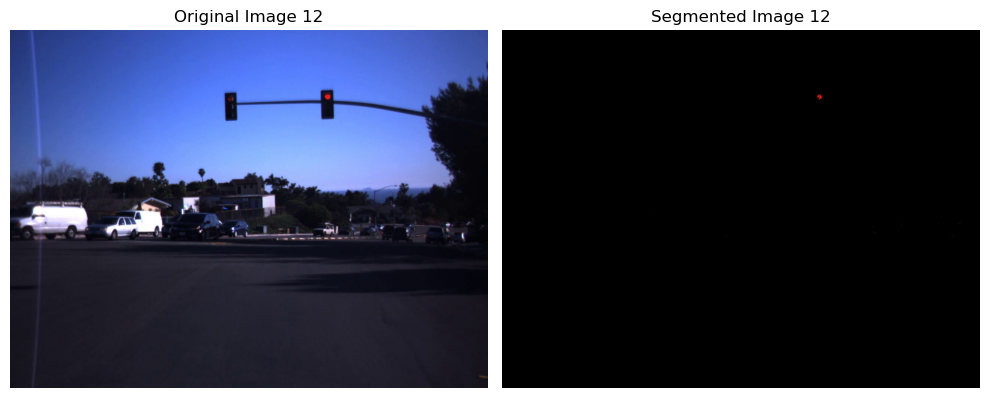

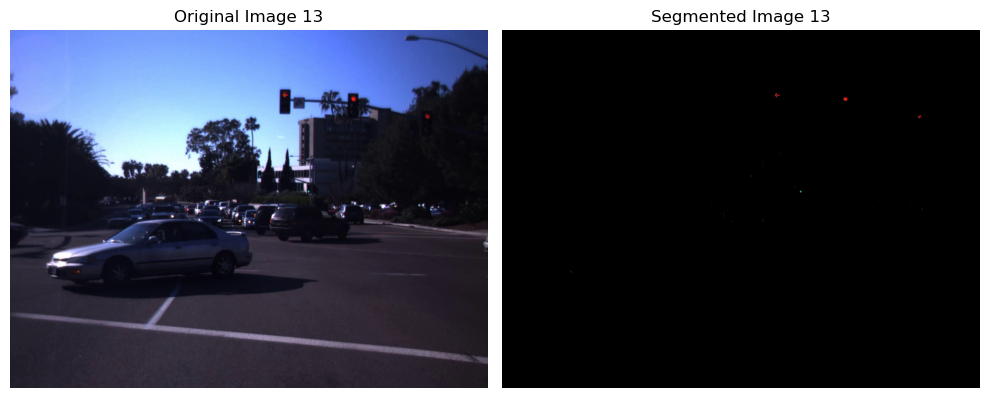

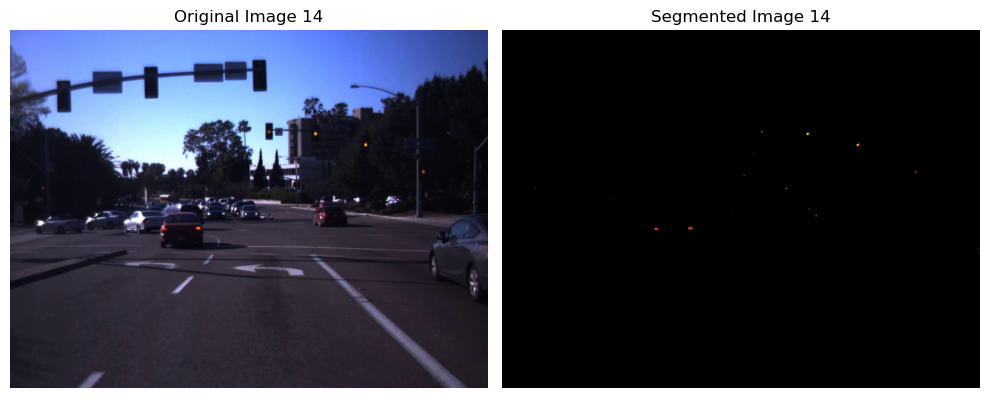

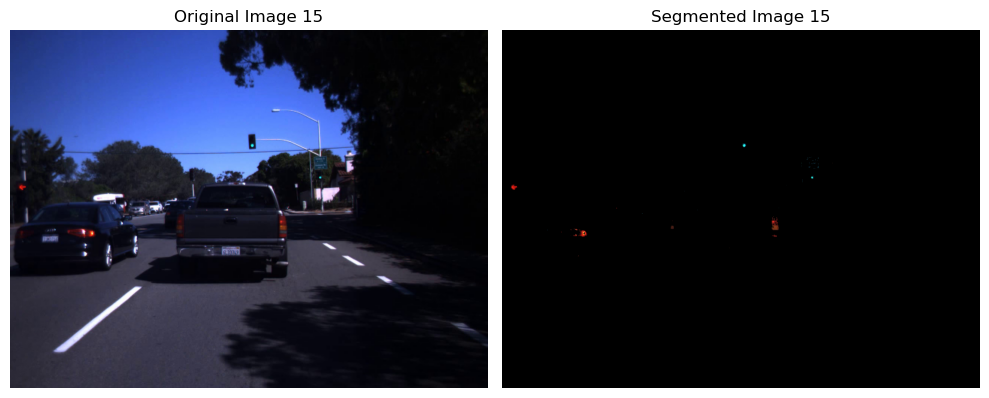

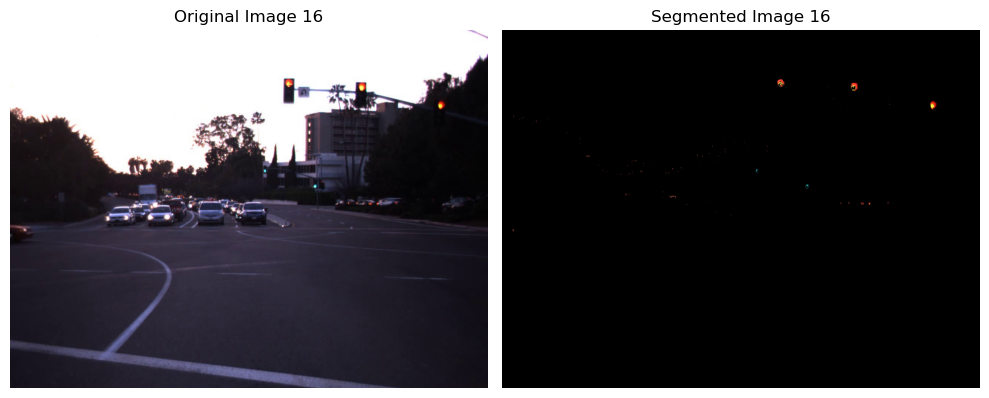

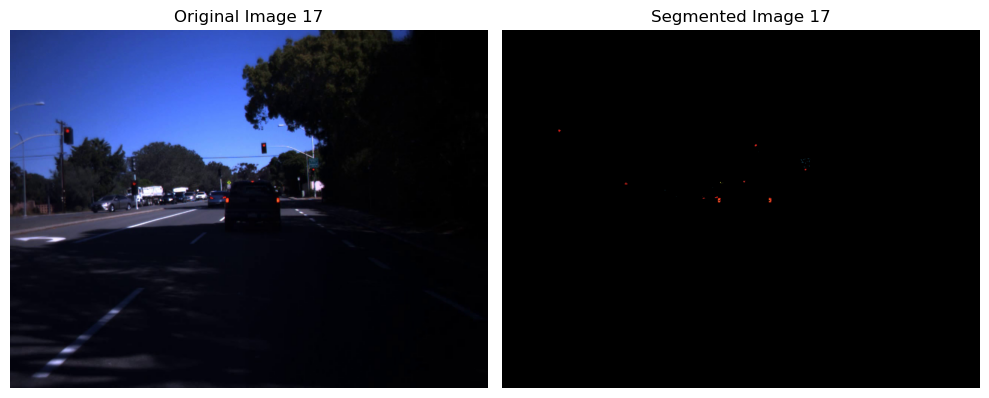

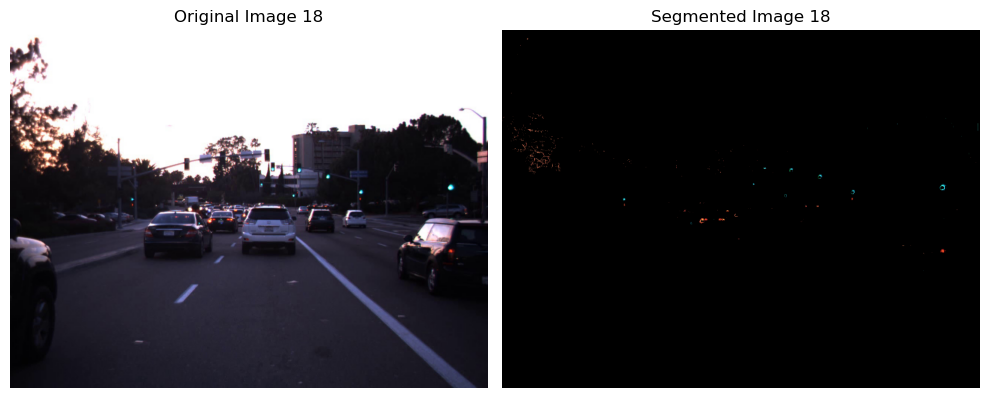

[ WARN:0@809.217] global /home/conda/feedstock_root/build_artifacts/libopencv_1658893721184/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('19.jpg'): can't open/read file: check file path/integrity
[ WARN:0@809.217] global /home/conda/feedstock_root/build_artifacts/libopencv_1658893721184/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('19.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /home/conda/feedstock_root/build_artifacts/libopencv_1658893721184/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:


def segment_traffic_lights(image_path, lower_red1, upper_red1, lower_red2, upper_red2, lower_yellow, upper_yellow, lower_green, upper_green):
    original_image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    combined_mask = cv2.bitwise_or(cv2.bitwise_or(red_mask1, red_mask2), cv2.bitwise_or(yellow_mask, green_mask))
    return cv2.bitwise_and(original_image, original_image, mask=combined_mask)

# Define HSV thresholds
lower_red1 = np.array([0, 140, 60])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([340, 140, 60])
upper_red2 = np.array([359, 255, 255])
lower_yellow = np.array([15, 150, 150])
upper_yellow = np.array([35, 255, 255])
lower_green = np.array([60, 160, 40])
upper_green = np.array([100, 255, 255])

# Process each image and display them
for i in range(1, 26):  
    image_path = f'{i}.jpg'
    original_image = cv2.imread(image_path)
    segmented_image = segment_traffic_lights(image_path, lower_red1, upper_red1, lower_red2, upper_red2, lower_yellow, upper_yellow, lower_green, upper_green)
    
    # Set up the subplot for original and segmented images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display the original image
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f'Original Image {i}')
    axes[0].axis('off')
    
    # Display the segmented image
    axes[1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'Segmented Image {i}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
